# Simulation & real data integration
By Yang Zhou

This notebook reproduces the Fig 2 in the scInt paper. The simulation dataset 1 were generated by Splatter package, simulation datasets 2 & 3 were obtained from https://figshare.com/articles/dataset/Benchmarking_atlas-level_data_integration_in_single-cell_genomics_-_integration_task_datasets_Immune_and_pancreas_/12420968. The human dendritic dataset was obtained from Gene Expression Omnibus database with accession code: GSE94820.

In [1]:
library(scInt)
source("C:/Users/ZhouYang/Desktop/reproducibility/utils.R")
fig.size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width, repr.plot.res = 300)
}

Warning message:
"package 'ggplot2' was built under R version 4.0.5"

********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots


Loading required package: RcppAnnoy

Warning message:
"package 'RcppAnnoy' was built under R version 4.0.3"
Warning message:
"package 'RColorBrewer' was built under R version 4.0.3"
Loading required package: grid

Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.0.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend




## Load simulation dataset 1 and meta data

In [3]:
dataset <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Simulations/Simulation_dataset_1/dataset.rds")
meta <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Simulations/Simulation_dataset_1/meta.rds")
dim(meta)

[1] 2401    4

## Run scInt integration

In [3]:
# run integration
data <- create.scInt(dataset, meta)
data <- normalize.Data(data)
data <- ident.cellIdentity(data, nfeatures = 2000, select.var = 'select')
data <- compute.Similarity(data, k = 5, T_th = 0.6, dims = 40)
data <- run.Integrate(data, npcs = 40, lambda = 5)
data <- run.umap(data, min_dist = .1)

0 cells are filtered in the Batch_1

0 cells are filtered in the Batch_2

0 cells are filtered in the Batch_3

102 genes are filtered

Compute the Adjusted Cross-batch Similarity

Find similar cells for batch 1

Done!

Find similar cells for batch 2

Done!

Find similar cells for batch 3

Done!



Time difference of 11.06064 secs
Time difference of 11.46944 secs


## Visualization

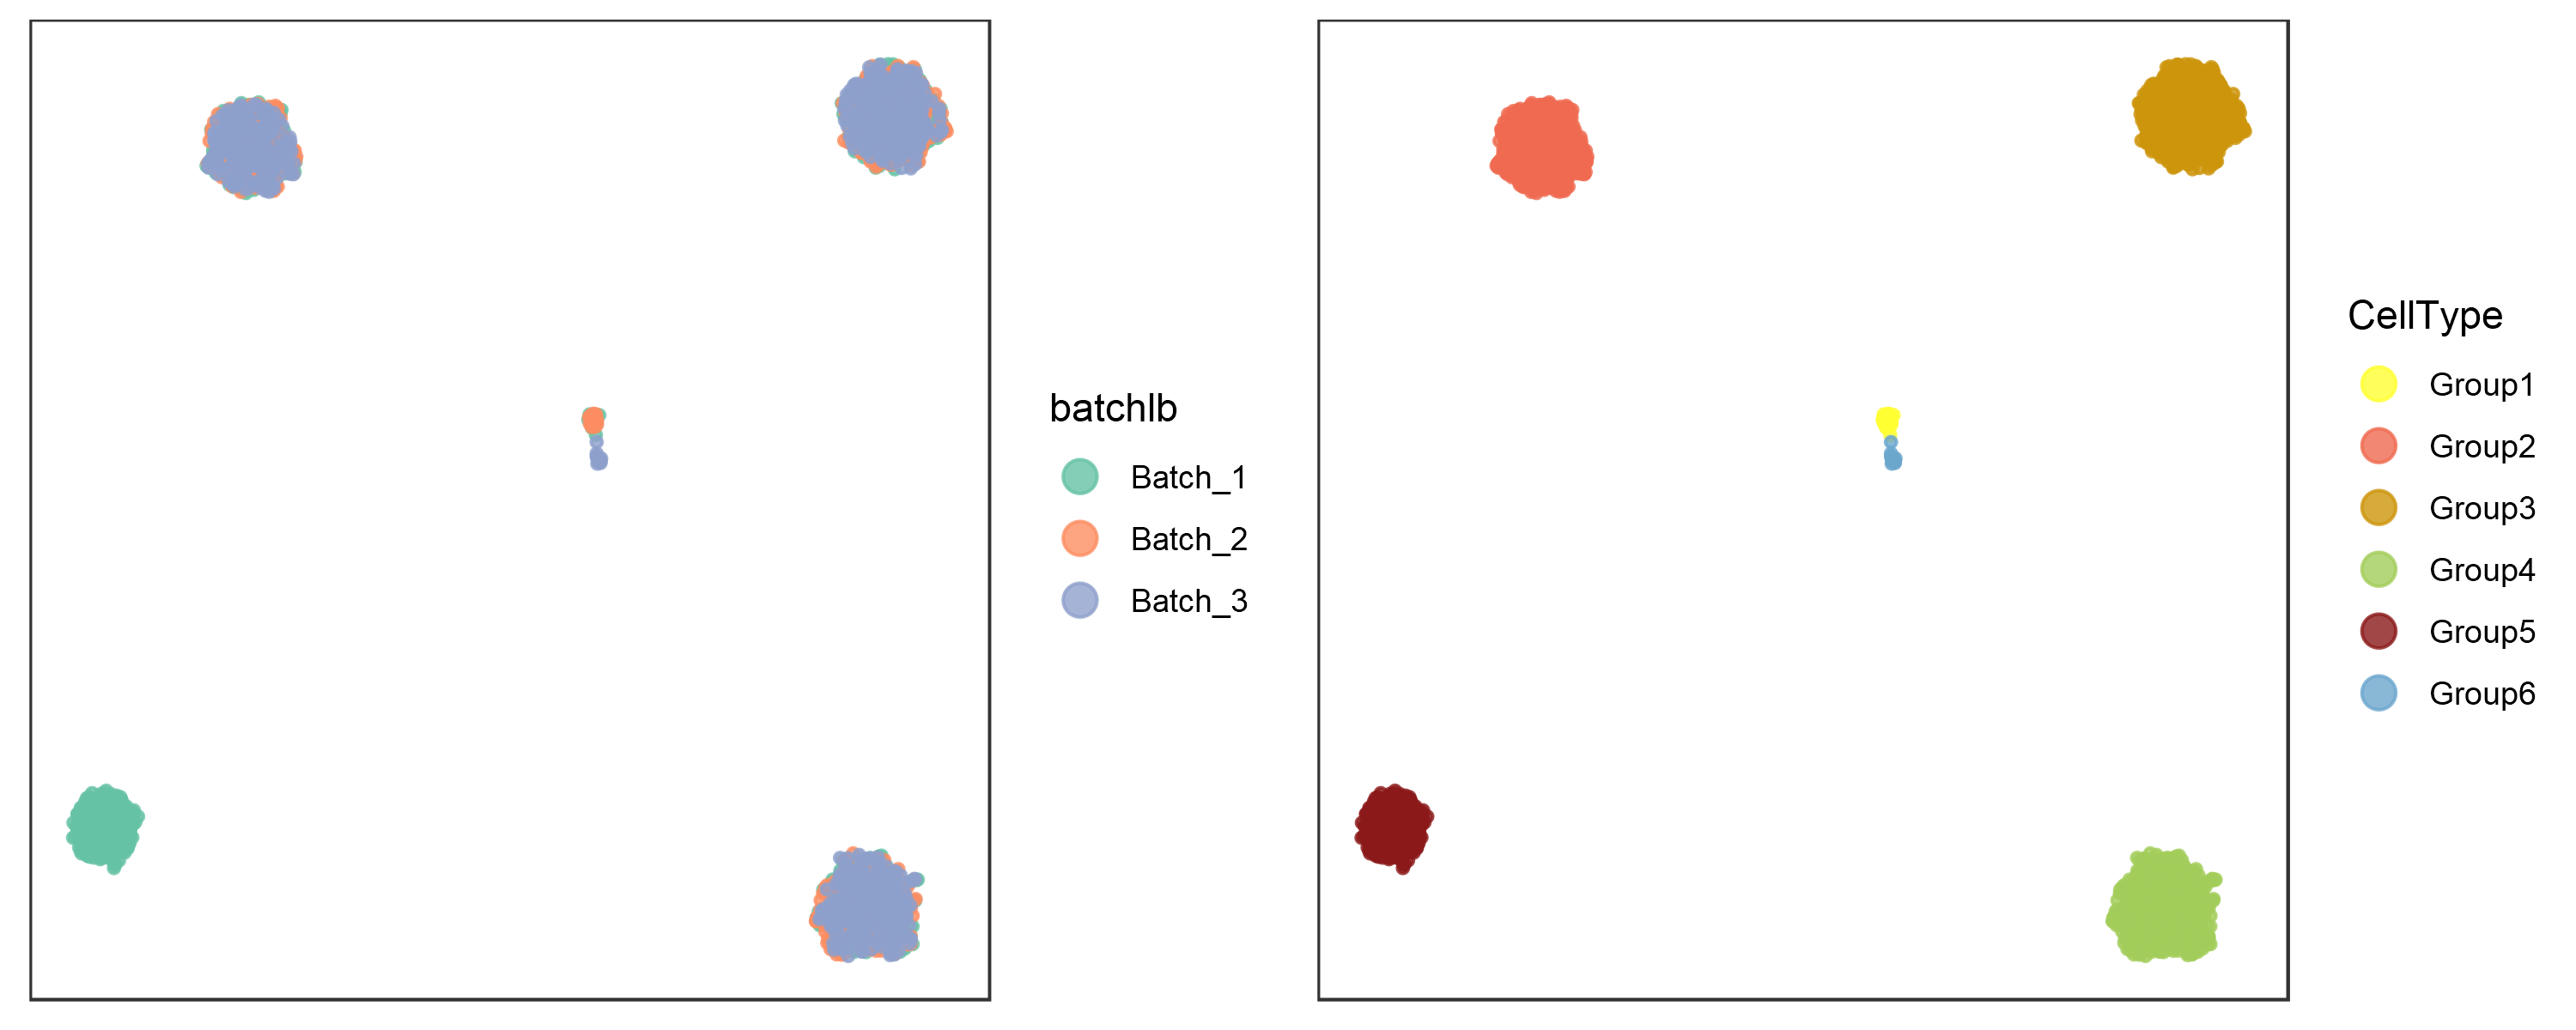

In [4]:
p1 <- dim.plot(data@int.umap, data@meta, colFactor = "batchlb", col.rev = T, size = 1)
p2 <- dim.plot(data@int.umap, data@meta, colFactor = "CellType", size = 1)
fig.size(4, 10)
cowplot::plot_grid(p1, p2)

## Load simulation dataset 2 and meta data

In [5]:
dataset <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Simulations/Simulation_dataset_2/dataset.rds")
meta <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Simulations/Simulation_dataset_2/meta.rds")
dim(meta)

[1] 12097     4

Batch_1 Batch_2 Batch_3 Batch_4 Batch_5 Batch_6 
   2908    2422    2120    1929    1761     957

## Run scInt integration

In [6]:
# run integration
data <- create.scInt(dataset, meta)
data <- normalize.Data(data)
data <- ident.cellIdentity(data, nfeatures = 2000, select.var = 'select')
data <- compute.Similarity(data, k = 5, T_th = 0.6, dims = 40)
data <- run.Integrate(data, npcs = 40, lambda = 5)
data <- run.umap(data, min_dist = .1)

0 cells are filtered in the Batch_1

0 cells are filtered in the Batch_2

0 cells are filtered in the Batch_3

0 cells are filtered in the Batch_4

0 cells are filtered in the Batch_5

0 cells are filtered in the Batch_6

9 genes are filtered

Compute the Adjusted Cross-batch Similarity

Find similar cells for batch 1

Done!

Find similar cells for batch 2

Done!

Find similar cells for batch 3

Done!

Find similar cells for batch 4

Done!

Find similar cells for batch 5

Done!

Find similar cells for batch 6

Done!



Time difference of 1.467532 mins
Time difference of 1.370962 mins


## Visualization

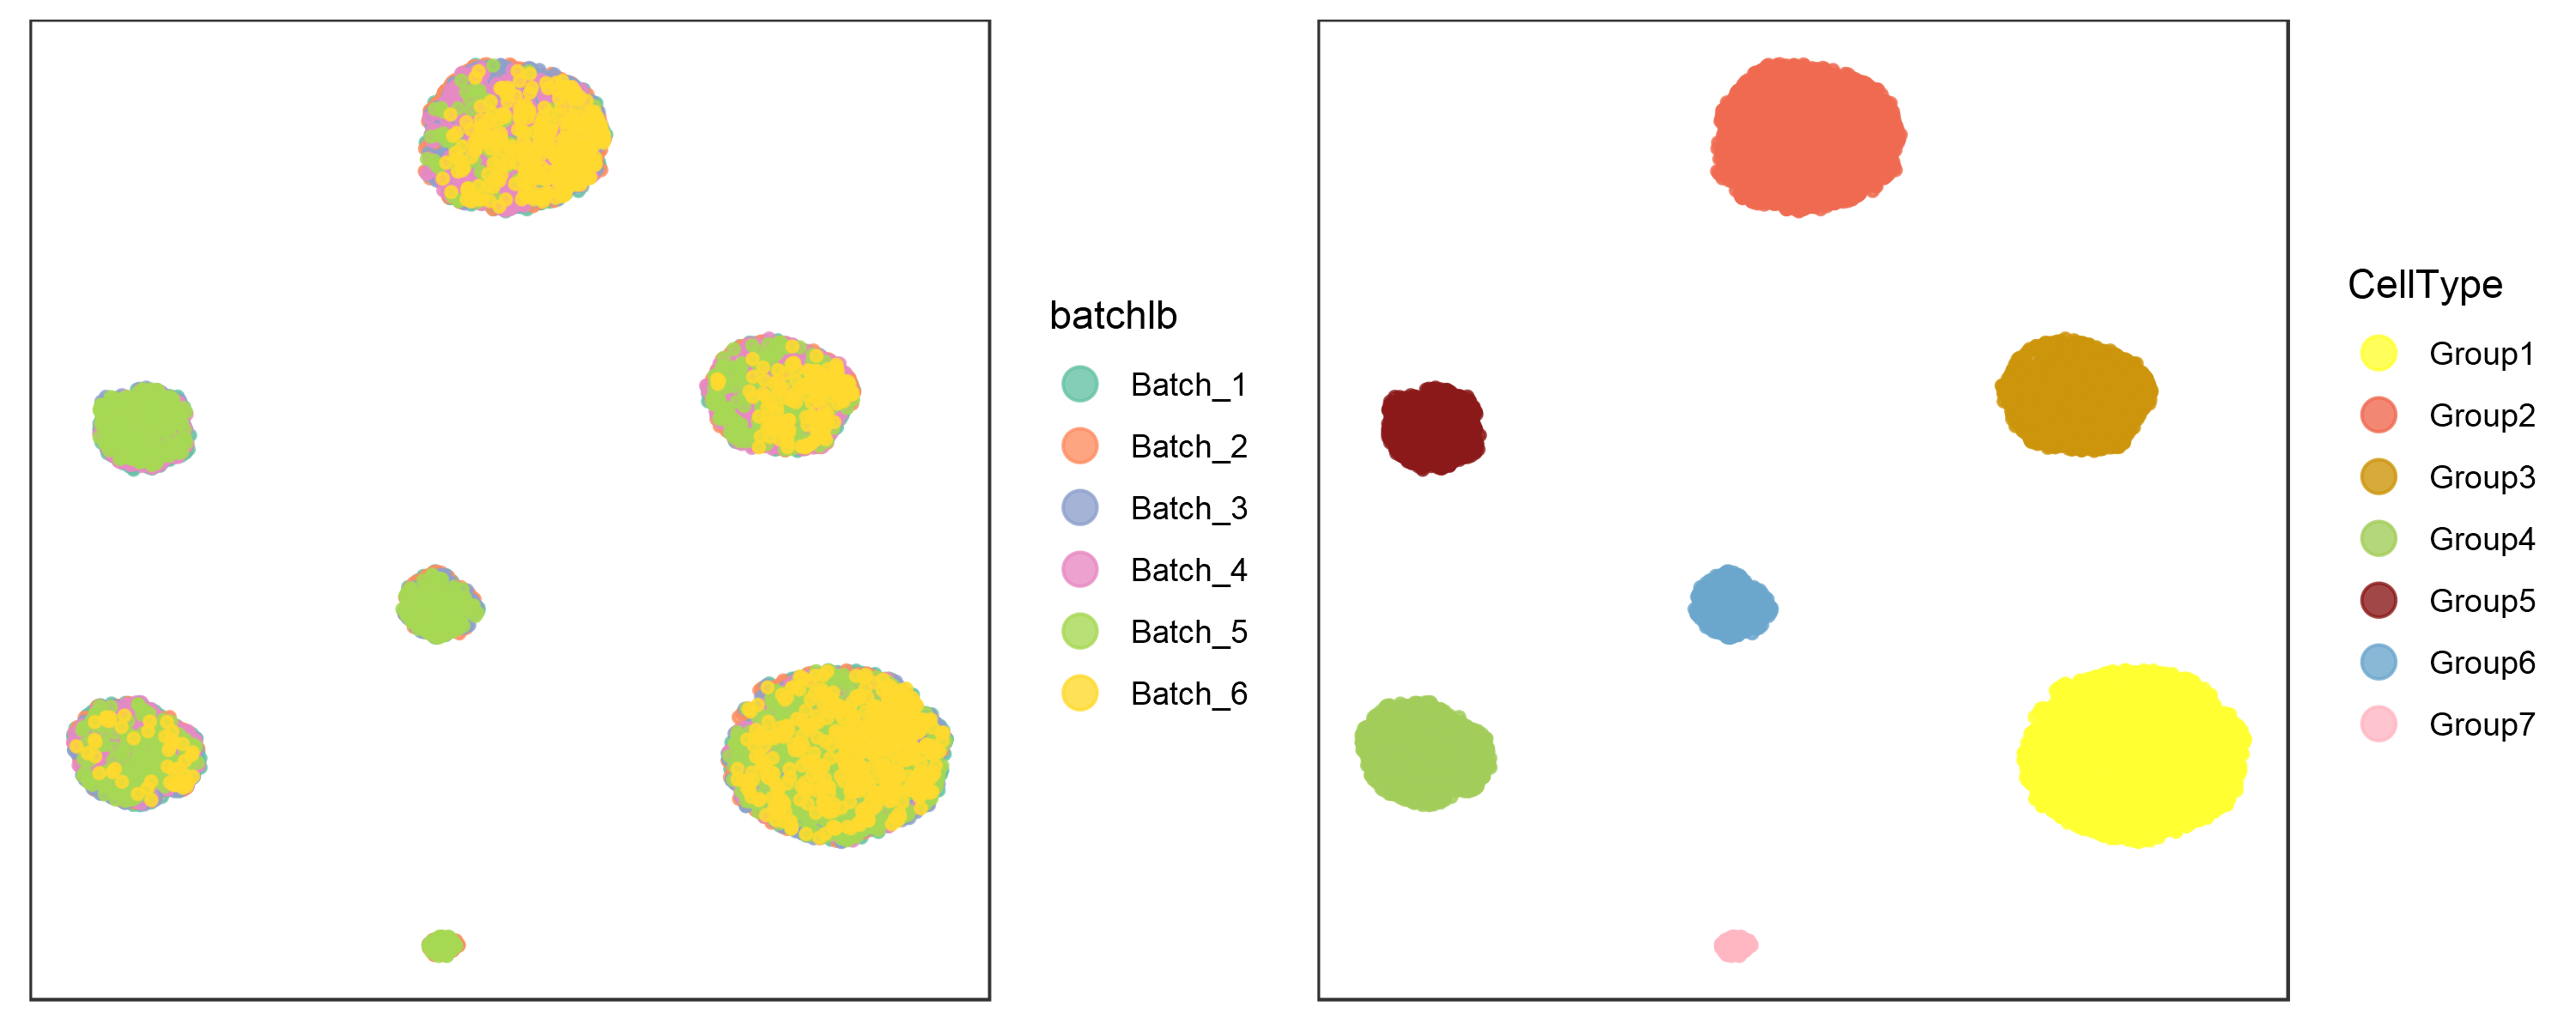

In [7]:
p1 <- dim.plot(data@int.umap, data@meta, colFactor = "batchlb", col.rev = T, size = 1)
p2 <- dim.plot(data@int.umap, data@meta, colFactor = "CellType", size = 1)
fig.size(4, 10)
cowplot::plot_grid(p1, p2)

## Load simulation dataset 3 and meta data

In [6]:
dataset <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Simulations/Simulation_dataset_3/dataset.rds")
meta <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Simulations/Simulation_dataset_3/meta.rds")
dim(meta)
summary(as.factor(meta$batchlb))

[1] 19318     4

Batch1Sub1 Batch1Sub2 Batch1Sub3 Batch1Sub4 Batch2Sub1 Batch2Sub2 Batch2Sub3 
      1200       1204       1210       1192       1466       1471        984 
Batch2Sub4 Batch3Sub1 Batch3Sub2 Batch3Sub3 Batch3Sub4 Batch4Sub1 Batch4Sub2 
       984       1930       1205       1189        485       1687       1676 
Batch4Sub3 Batch4Sub4 
       716        719

## Run scInt integration

In [9]:
# run integration
data <- create.scInt(dataset, meta)
data <- normalize.Data(data)
data <- ident.cellIdentity(data, nfeatures = 2000, select.var = 'select')
data <- compute.Similarity(data, k = 5, T_th = 0.6, dims = 40)
data <- run.Integrate(data, npcs = 40, lambda = 5)
data <- run.umap(data, min_dist = .1)

0 cells are filtered in the Batch1Sub1

0 cells are filtered in the Batch1Sub2

0 cells are filtered in the Batch1Sub3

0 cells are filtered in the Batch1Sub4

0 cells are filtered in the Batch2Sub1

0 cells are filtered in the Batch2Sub2

0 cells are filtered in the Batch2Sub3

0 cells are filtered in the Batch2Sub4

0 cells are filtered in the Batch3Sub1

0 cells are filtered in the Batch3Sub2

0 cells are filtered in the Batch3Sub3

0 cells are filtered in the Batch3Sub4

0 cells are filtered in the Batch4Sub1

0 cells are filtered in the Batch4Sub2

0 cells are filtered in the Batch4Sub3

0 cells are filtered in the Batch4Sub4

0 genes are filtered

Compute the Adjusted Cross-batch Similarity

Find similar cells for batch 1

Done!

Find similar cells for batch 2

Done!

Find similar cells for batch 3

Done!

Find similar cells for batch 4

Done!

Find similar cells for batch 5

Done!

Find similar cells for batch 6

Done!

Find similar cells for batch 7

Done!

Find similar cells f

Time difference of 3.454555 mins
Time difference of 1.390991 mins


## Visualization

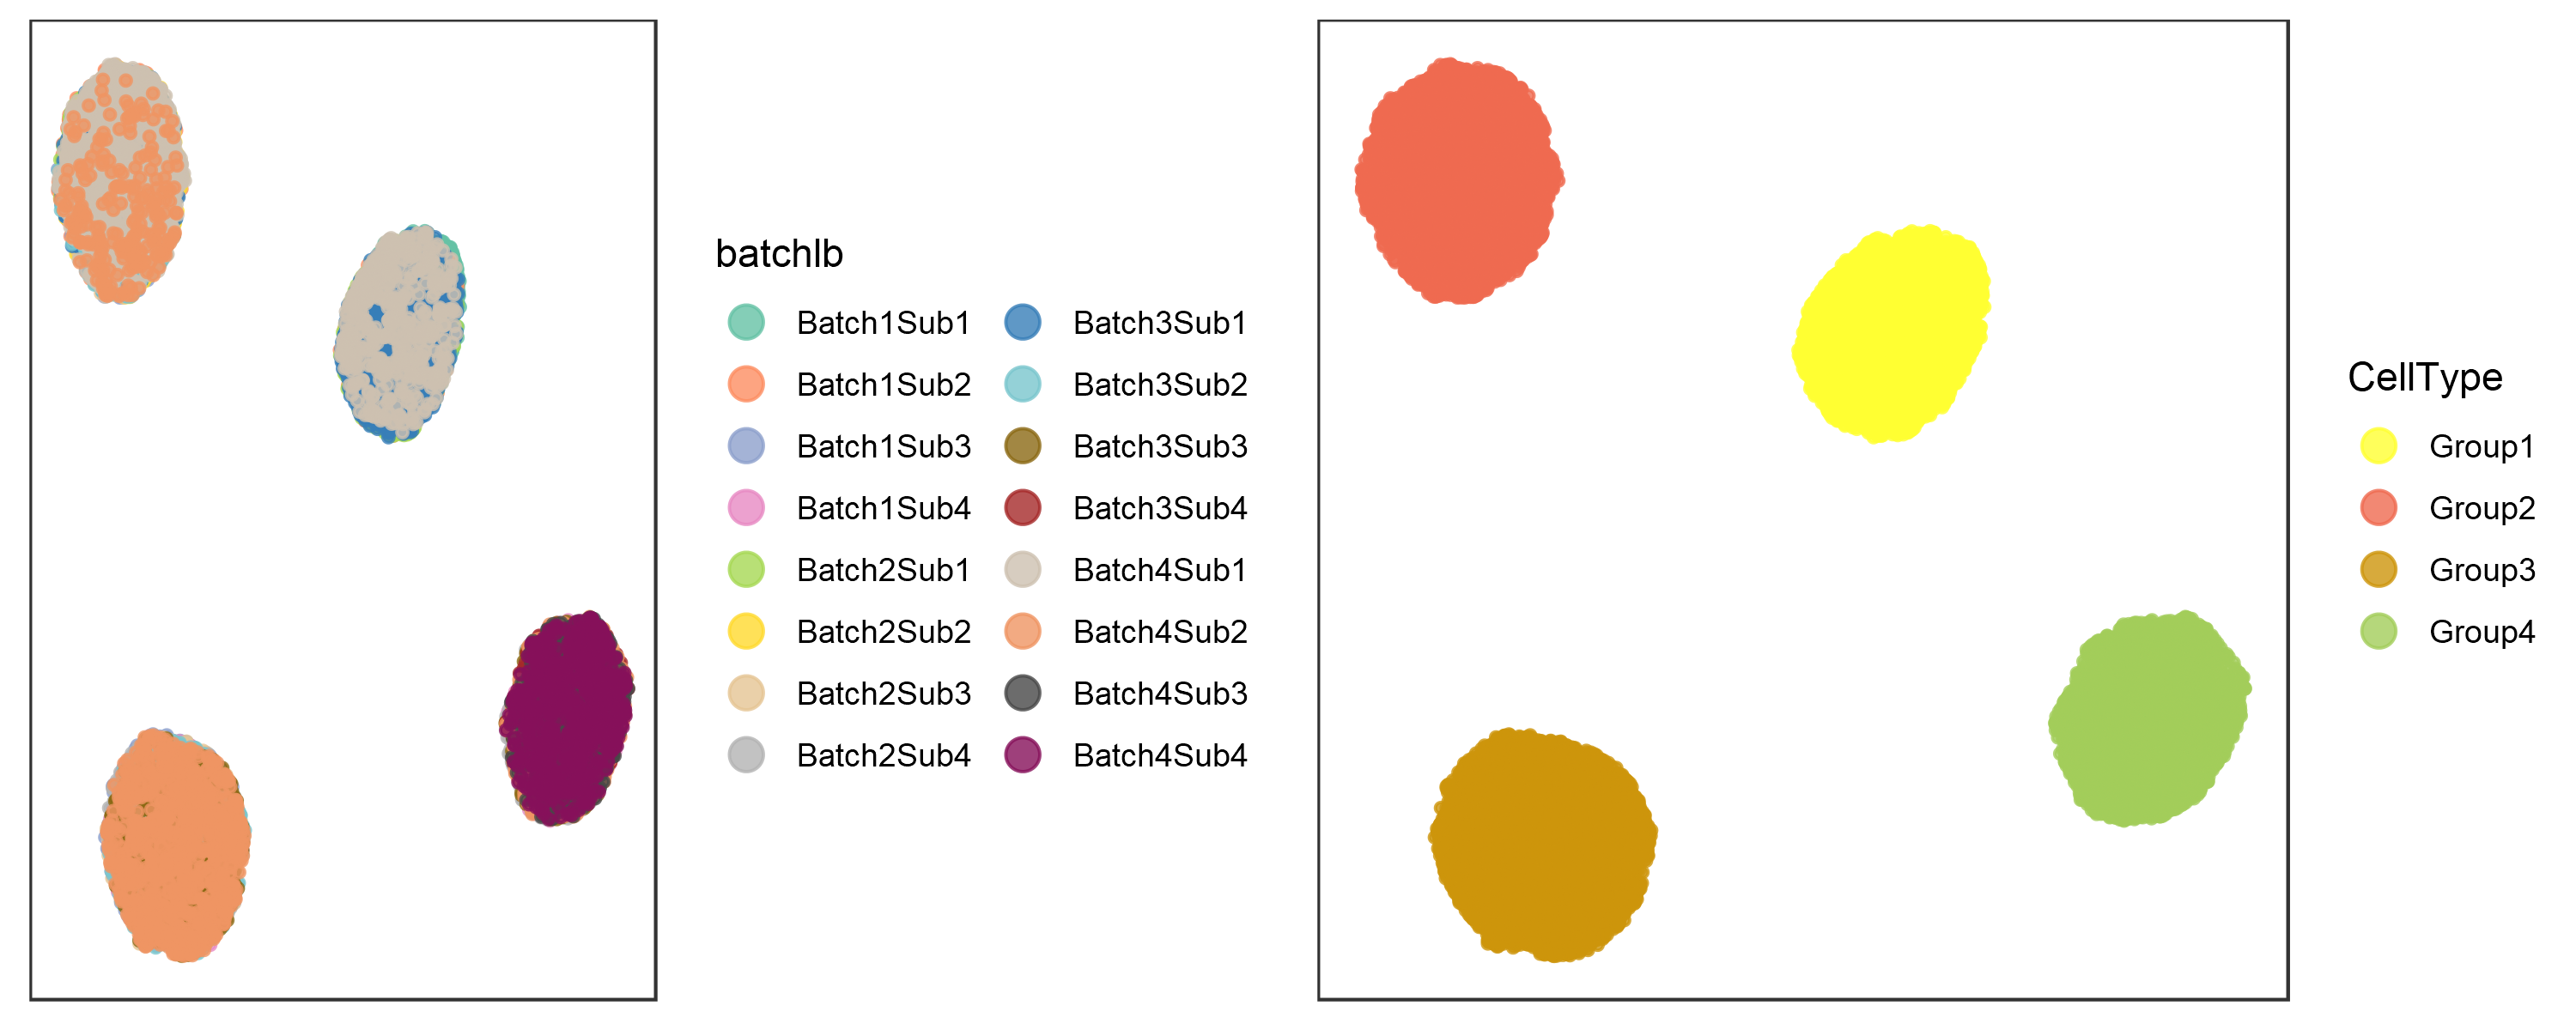

In [10]:
p1 <- dim.plot(data@int.umap, data@meta, colFactor = "batchlb", col.rev = T, size = 1)
p2 <- dim.plot(data@int.umap, data@meta, colFactor = "CellType", size = 1)
fig.size(4, 10)
cowplot::plot_grid(p1, p2)

## Load human dendritic dataset 3 and meta data

In [2]:
dataset <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Human_dendritic/dataset.rds")
meta <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Human_dendritic/meta.rds")
dim(meta)
summary(as.factor(meta$batchlb))

[1] 576   4

Batch_1 Batch_2 
    288     288

## Run scInt integration

In [12]:
# run integration
data <- create.scInt(dataset, meta)
data <- normalize.Data(data)
data <- ident.cellIdentity(data, nfeatures = 2000, select.var = 'select')
data <- compute.Similarity(data, k = 5, T_th = 0.75, dims = 50)
data <- run.Integrate(data, npcs = 40, lambda = 5)
data <- run.umap(data, min_dist = .1)

6 cells are filtered in the Batch_1

5 cells are filtered in the Batch_2

8944 genes are filtered

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Compute the Adjusted Cross-batch Similarity

Find similar cells for batch 1

Done!

Find similar cells for batch 2

Done!



Time difference of 3.265733 secs
Time difference of 3.038183 secs


## Visualization

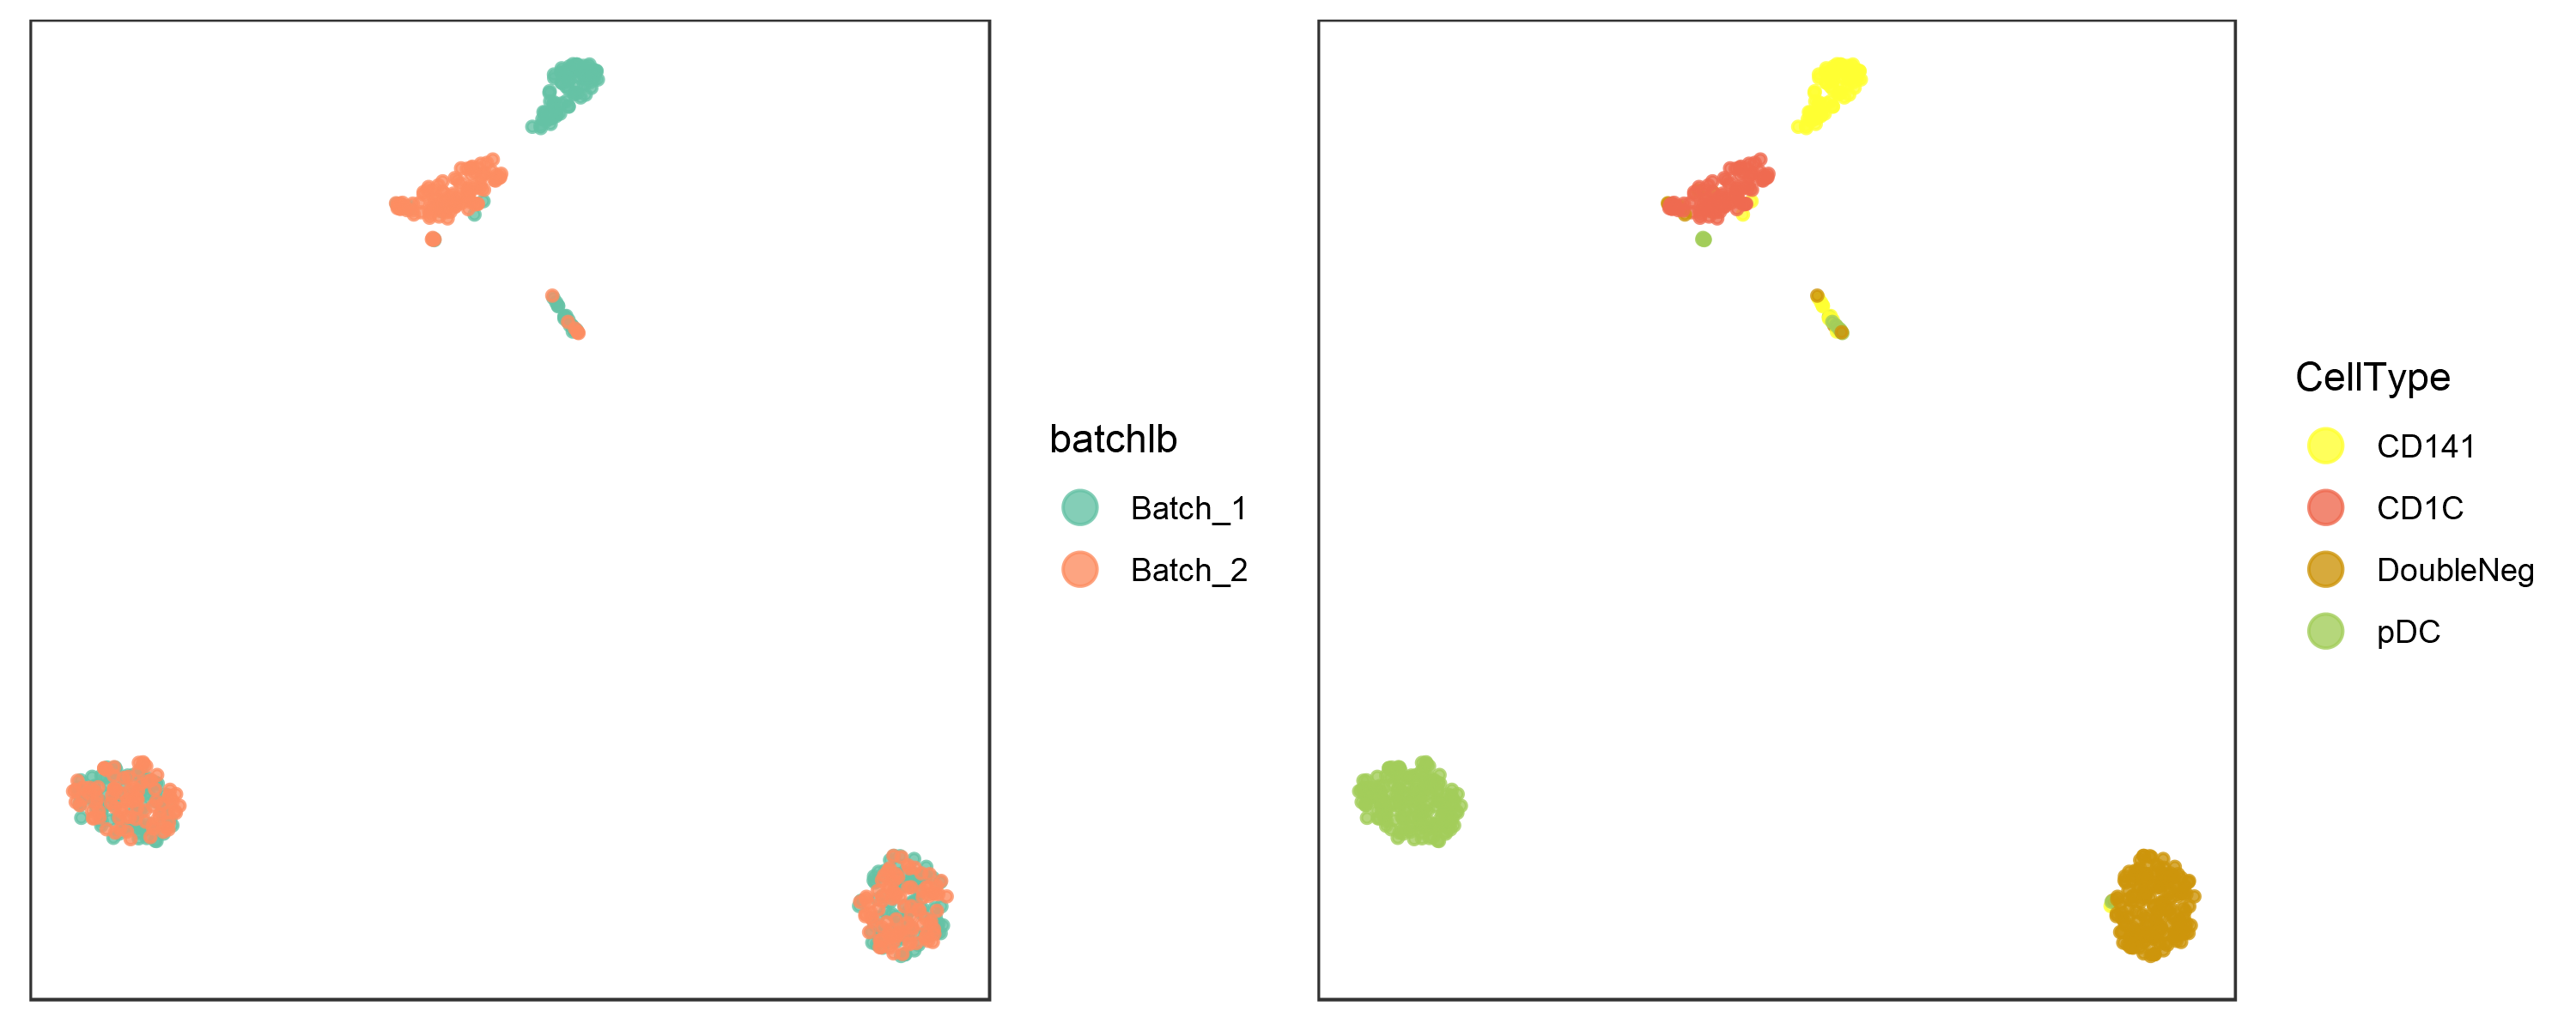

In [13]:
p1 <- dim.plot(data@int.umap, data@meta, colFactor = "batchlb", col.rev = T, size = 1)
p2 <- dim.plot(data@int.umap, data@meta, colFactor = "CellType", size = 1)
fig.size(4, 10)
cowplot::plot_grid(p1, p2)

In [14]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19044)

Matrix products: default

locale:
[1] LC_COLLATE=Chinese (Simplified)_China.936 
[2] LC_CTYPE=Chinese (Simplified)_China.936   
[3] LC_MONETARY=Chinese (Simplified)_China.936
[4] LC_NUMERIC=C                              
[5] LC_TIME=Chinese (Simplified)_China.936    

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] gtable_0.3.0       pheatmap_1.0.12    gridExtra_2.3      ggpubr_0.4.0      
 [5] RColorBrewer_1.1-2 RcppAnnoy_0.0.18   patchwork_1.0.1    cowplot_1.0.0     
 [9] ggplot2_3.3.5      scInt_1.0         

loaded via a namespace (and not attached):
  [1] readxl_1.3.1          uuid_1.0-4            backports_1.1.7      
  [4] RcppEigen_0.3.3.9.1   plyr_1.8.6            igraph_1.2.5         
  [7] repr_1.1.4            lazyeval_0.2.2        splines_4.0.2        
 [10] liste